In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
df = pd.read_csv(r'./Data/universities_processed.csv')
df.head(5)

,Institution Name,Region,Country,Overall,Academic Reputation,Employer Reputation,Faculty Student Ratio,Citations Per Faculty,International Faculty Ratio,International Students Ratio,International Research Network,Employment Outcomes,Sustainability
0,Massachusetts Institute of Technology (MIT),North America,United States,100.0,100.0,100.0,100.0,100.0,100.0,88.2,94.3,100.0,95.2
1,University of Cambridge,Europe,United Kingdom,99.2,100.0,100.0,100.0,92.3,100.0,95.8,99.9,100.0,97.3
2,University of Oxford,Europe,United Kingdom,98.9,100.0,100.0,100.0,90.6,98.2,98.2,100.0,100.0,97.8
3,Harvard University,North America,United States,98.3,100.0,100.0,98.3,100.0,84.6,66.8,100.0,100.0,96.7
4,Stanford University,North America,United States,98.1,100.0,100.0,100.0,99.9,99.9,51.2,95.8,100.0,94.4


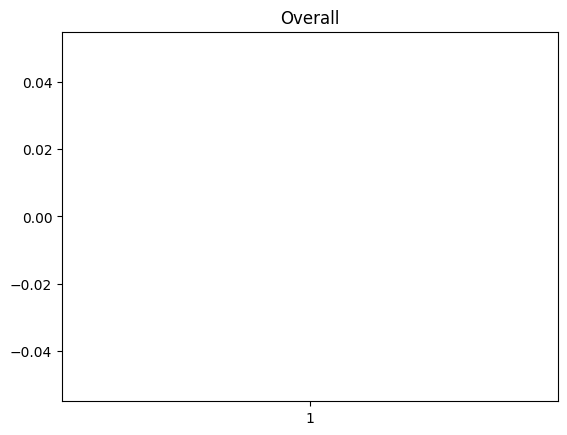

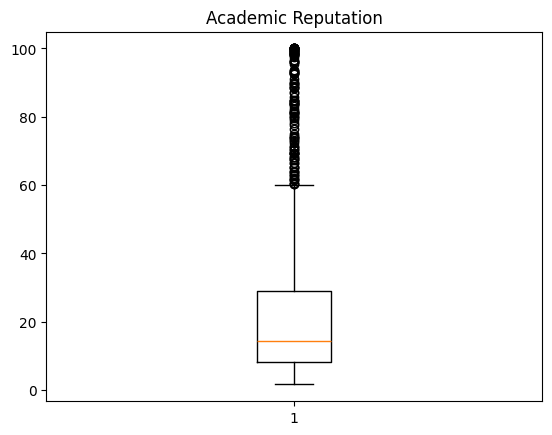

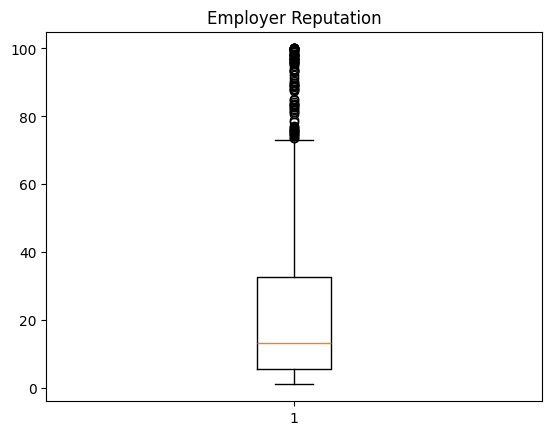

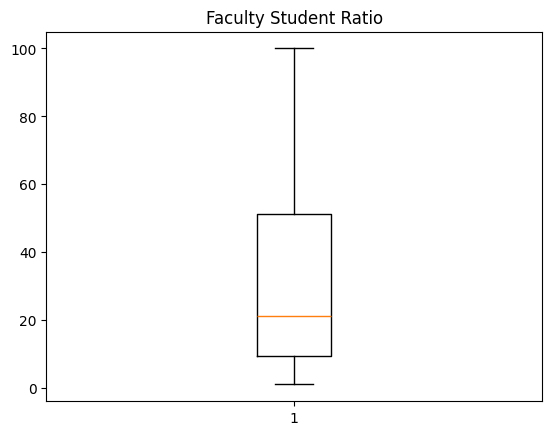

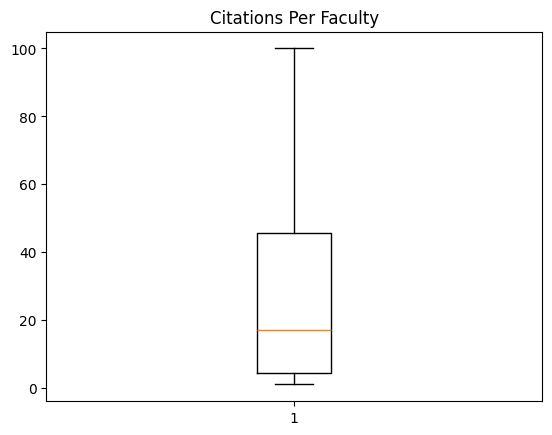

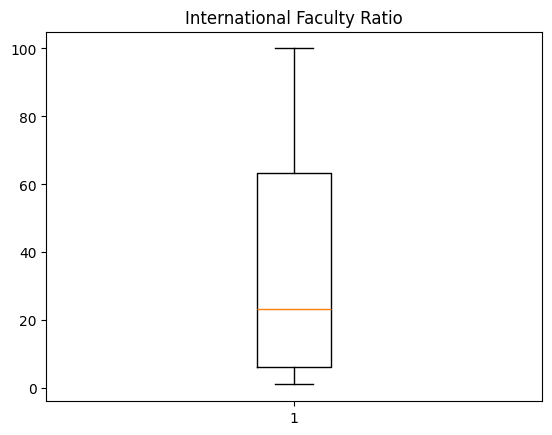

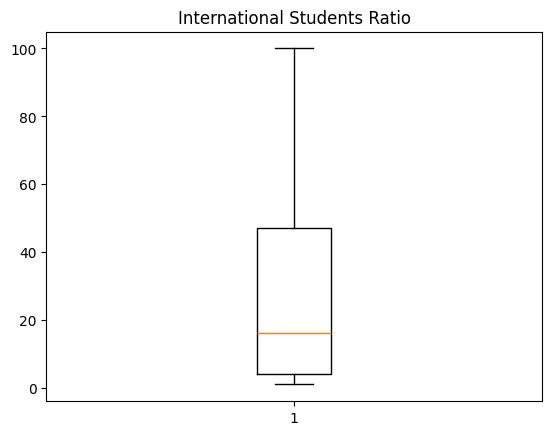

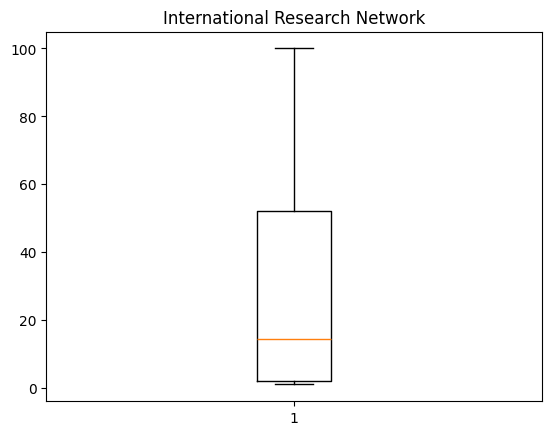

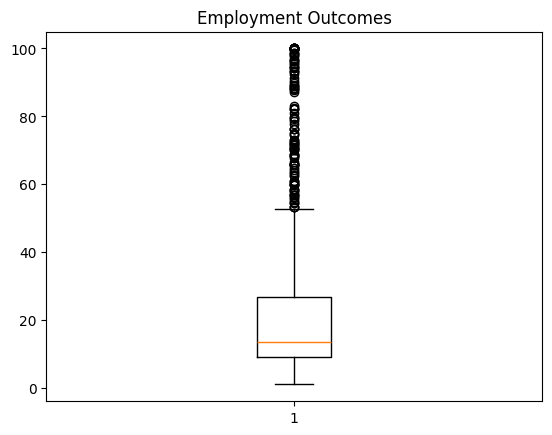

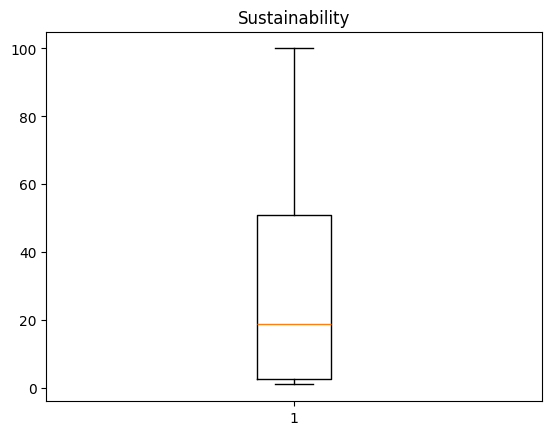

In [9]:
for column in df.columns:
    if column != 'Institution Name' and \
        column != 'Region' and \
        column != 'Country':
            plt.boxplot(df[column])
            plt.title(column)
            plt.show()

In [10]:
def reduce_noise(df: pd.DataFrame, column: str) -> pd.DataFrame:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR

    upper_array = np.where(df[column] >= upper)[0]
    lower_array = np.where(df[column] <= lower)[0]

    mean = np.median(df[column])

    for index in upper_array:
        df.at[index,column] = mean
    
    for index in lower_array:
        df.at[index,column] = mean 

    return df 

df = reduce_noise(df, 'Academic Reputation')
df = reduce_noise(df, 'Employer Reputation')
df = reduce_noise(df, 'Employment Outcomes')

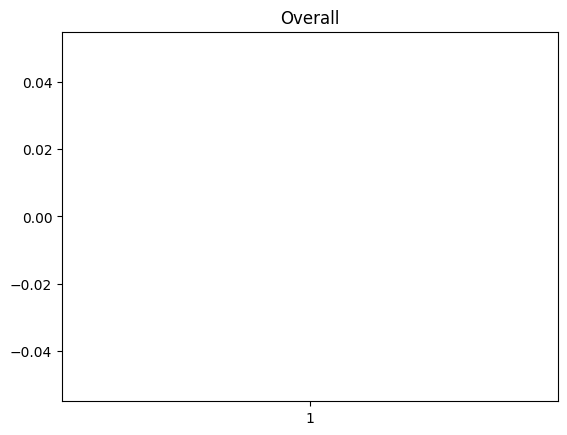

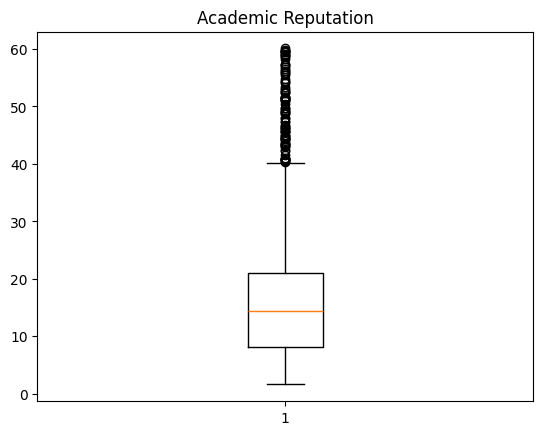

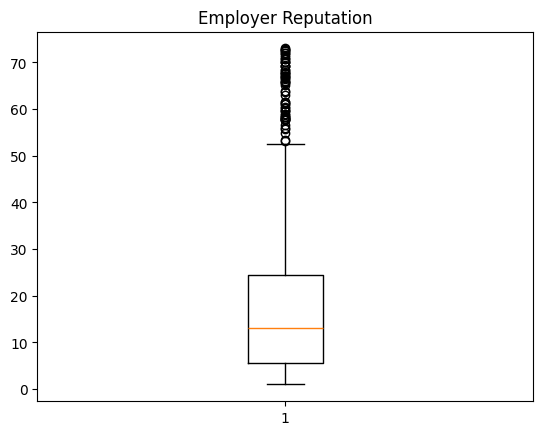

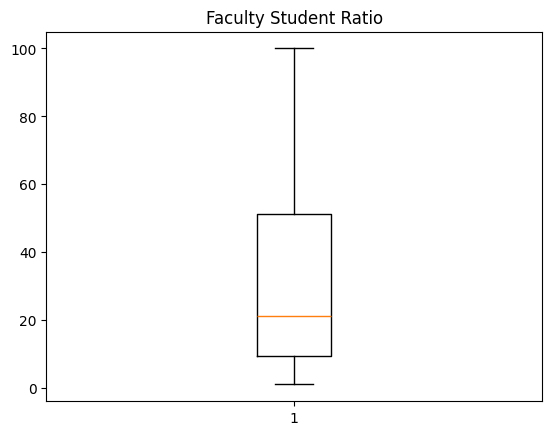

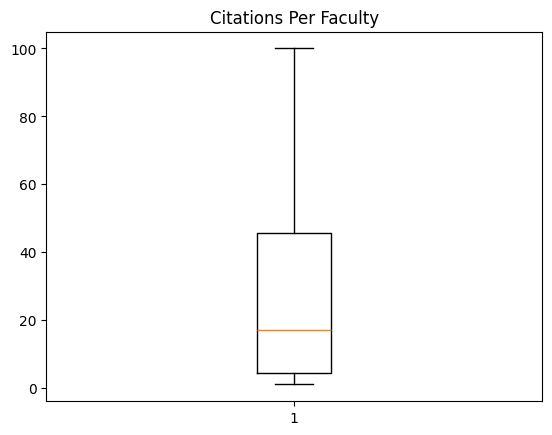

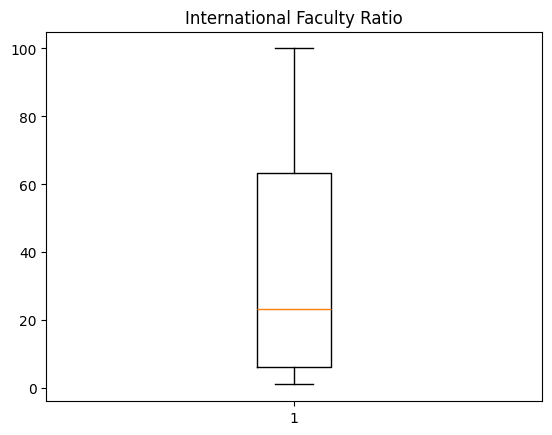

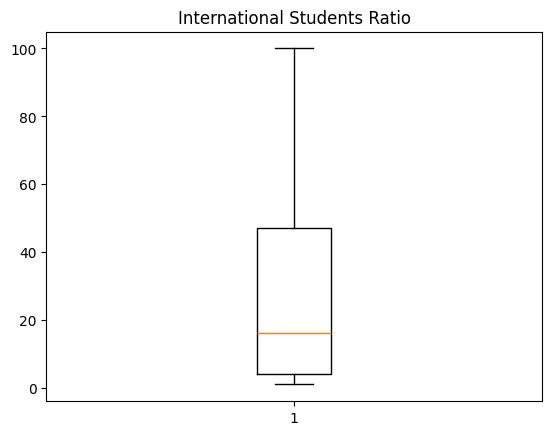

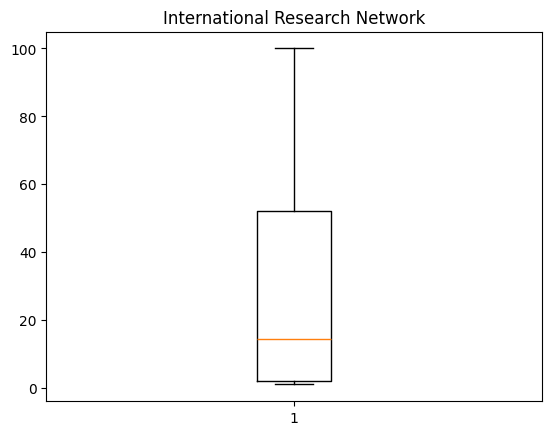

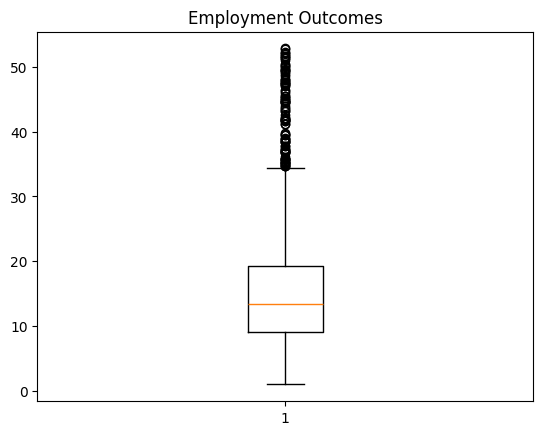

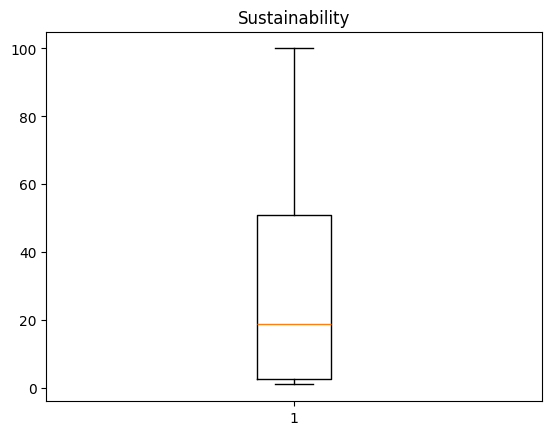

In [11]:
for column in df.columns:
    if column != 'Institution Name' and \
        column != 'Region' and \
        column != 'Country':
            plt.boxplot(df[column])
            plt.title(column)
            plt.show()

In [12]:
file_path ='./Data/universities_processed.csv'

df.to_csv(file_path, index=False)